In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import math
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tornado-data/storm-data.xlsx


In [140]:
data = pd.read_excel("/kaggle/input/tornado-data/storm-data.xlsx")

In [141]:
len(data)

40

# Normalisation de donnees

In [142]:
# Rééchelonnage Event-type
def normalize_event_type(data):
    event = data['EVENT_TYPE']

    data['EVENT_TYPE_normalized'] = np.where(data['EVENT_TYPE'] == 'Tornado', 1, 0)
    # Supprimer la colonne originale 'etat_trafic' si vous le souhaitez
    #data.drop('taux_co2', axis=1, inplace=True)
    return data

 # Afficher jeu de donnée avant de construire le modèle :

In [143]:
data = normalize_event_type(data)
display(data.head(10))
print(len(data))

,EVENT_ID,CZ_NAME_STR,BEGIN_DATE,BEGIN_TIME,EVENT_TYPE,CZ_FIPS,TOR_LENGTH,TOR_WIDTH,END_DATE,END_TIME,TEMP_MIN,RAIN_SUM,WINDSPEED,EVENT_TYPE_normalized
0,1079102.0,WALTON CO.,01/22/2023,514.0,Tornado,131.0,0.78,85.0,01/22/2023,515.0,11.4,34.3,23.1,1
1,1079103.0,WAKULLA CO.,01/22/2023,1245.0,Tornado,129.0,0.33,200.0,01/22/2023,1246.0,11.6,28.7,24.8,1
2,NaN,WALTON CO.,01/23/2023,NaN,Non,NaN,NaN,NaN,NaN,NaN,6.6,0.0,15.3,0
3,1079101.0,WALTON CO.,01/25/2023,516.0,Tornado,131.0,0.57,50.0,01/25/2023,520.0,9.6,23.5,26.6,1
4,1079098.0,LIBERTY CO.,01/25/2023,834.0,Tornado,77.0,0.47,50.0,01/25/2023,835.0,12.3,31.2,23.1,1
5,1079095.0,LEON CO.,01/25/2023,1023.0,Tornado,73.0,3.24,550.0,01/25/2023,1027.0,12.8,20.2,24.6,1
6,1079904.0,WALTON CO.,2023-09-02 00:00:00,2026.0,Tornado,131.0,0.18,50.0,2023-09-02 00:00:00,2028.0,16.2,2.0,17.1,1
7,NaN,LIBERTY CO.,2023-03-02 00:00:00,NaN,Non,NaN,NaN,NaN,NaN,NaN,9.3,6.3,19.8,0
8,NaN,WAKULLA CO.,02/16/2023,NaN,Non,NaN,NaN,NaN,NaN,NaN,14.6,0.0,19.2,0
9,1084640.0,WALTON CO.,03/17/2023,1820.0,Tornado,131.0,0.12,25.0,03/17/2023,1821.0,13.1,9.5,29.0,1


40


# Lecture du jeu de donnée :

In [144]:
X = data[['TEMP_MIN', 'RAIN_SUM', 'WINDSPEED']]
y = data['EVENT_TYPE_normalized']
# print(X)
# print(y)

In [145]:
# Split the data into training and testing sets
def div_data(X):
    split = int(0.8 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    #print(len(X_test))
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test= div_data(X)

# Logistic Regression model

In [146]:
# Create a Linear Regression model
model = LogisticRegression()

In [147]:
# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
# Set a threshold (e.g., 0.5) to convert continuous predictions to binary predictions
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)
print(y_pred_binary)

[1 1 1 0 0 1 1 1]


In [148]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary, zero_division=1)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.75
Confusion Matrix:
 [[0 0]
 [2 6]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.75      0.86         8

    accuracy                           0.75         8
   macro avg       0.50      0.88      0.43         8
weighted avg       1.00      0.75      0.86         8



# Résultat d'entrainement :

In [149]:
feature_names = ['TEMP_MIN', 'RAIN_SUM', 'WINDSPEED']

# Create a DataFrame for new_data with the same feature names
new_data = pd.DataFrame(np.array([[30.0, 0.0, 0.0]]), columns=feature_names)

tornado_prediction = model.predict(new_data)
print(tornado_prediction)

[1]


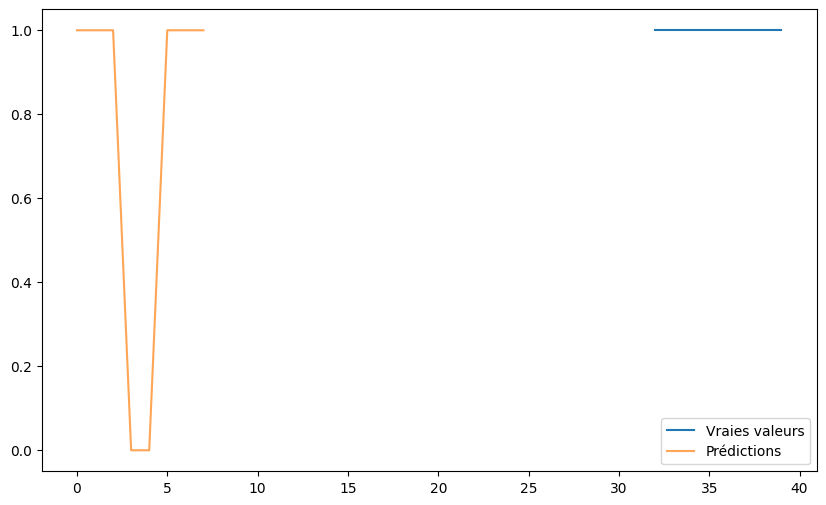

In [150]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Vraies valeurs')
plt.plot(y_pred, label='Prédictions', alpha=0.7)
plt.legend()
plt.show()

R-squared: 0.0%


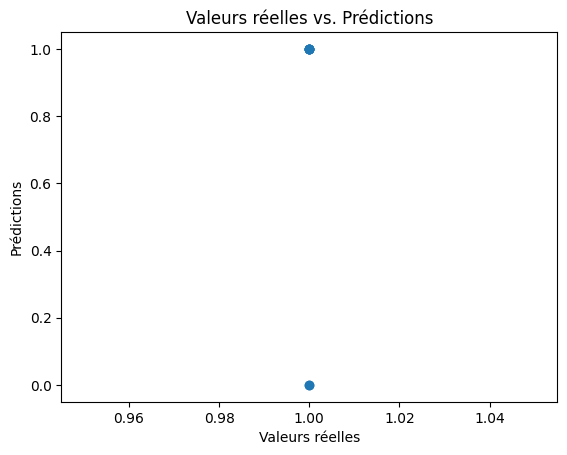

In [151]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2 * 100}%')
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs réelles vs. Prédictions')
plt.show()

# Save model to pickle file

In [153]:
import pickle
with open('prediction-tornado.pkl', 'wb') as file:
    pickle.dump(model, file)